# Práctica 3

Descripción: Cálculo de una variable I.

Bibliografía:
 
 Kong, Q, Siauw, T. and Bayen, A. M., "Python Programming and Numerical Methods". Elsevier.

 Sympy documentation: https://docs.sympy.org/latest/index.html
 
 Meurer, A. et alt., "SymPy: symbolic computing in Python". PeerJ Computer Science.
                

## Representación gráfica de funciones

En primer lugar importaremos los paquetes que utilizaremos

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sy
import math

### Funciones explícitas

Se pueden representar funciones de diferentes formas. Una posibilidad es utilizar matplotlib, para ello necesitamos una partición del intervalo en el que representaremos la función, para ello utilizaremos linspace de numpy. Veamos cómo hay que proceder.

In [2]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

Representaremos ahora los puntos de la forma (x,y)

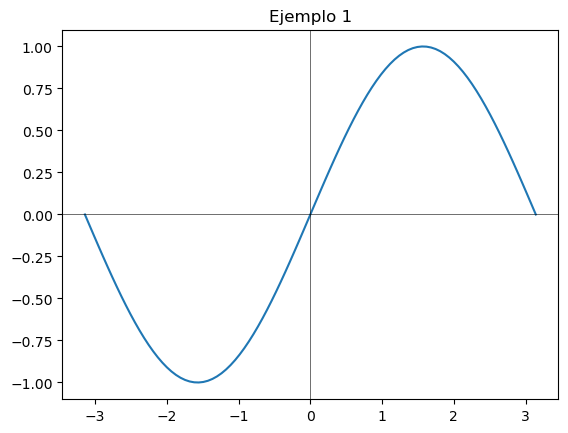

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("Ejemplo 1")
ax.axhline(linewidth=0.4, color='black')
ax.axvline(linewidth=0.4, color='black')


Otra forma es utilizar SymPy.

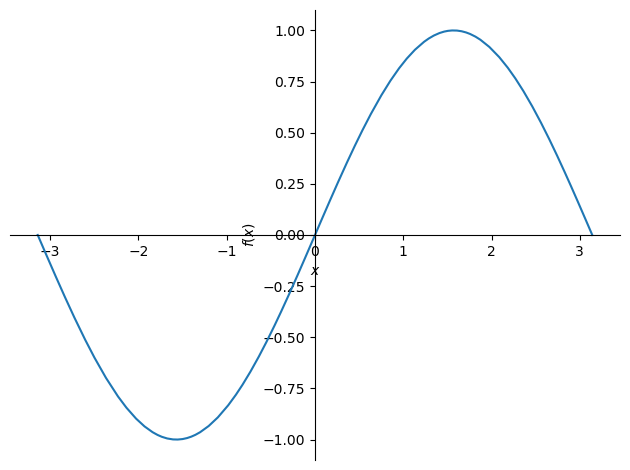

In [4]:
x = sy.symbols('x')
sy.plot(sy.sin(x),(x, -np.pi, np.pi))

Ahora dibuja la función $f(x)=x^3$ en el intervalo $[-1, 1]$.

In [5]:
## Introduce el código aquí

Ejercicio: Dibuja las siguientes funciones

a) $f(x)=x-\sqrt{x+2}{x-1}$;

b) $f(x)=\sqrt[4]{\frac{x}{\log(x)}}$;

c) $f(x)=\log\left(\sin\left(\frac{\pi}{x}\right)\right)$.



In [6]:
## Introduce el código aquí

### Funciones parametrizadas

Veamos que el procedimiento es similar. Tenemos las dos opciones.

Text(0.5, 1.0, 'Ejemplo: Una circunferencia')

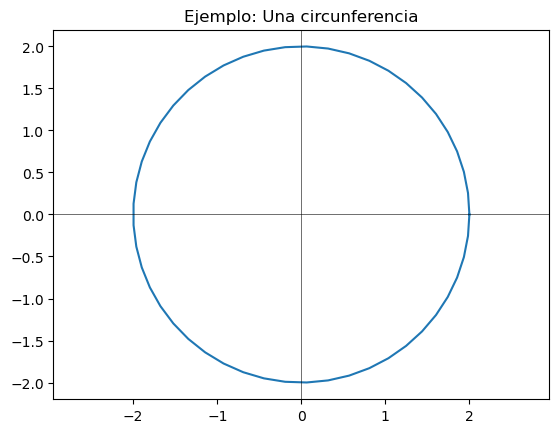

In [7]:
t = np.linspace(0, 2*np.pi, 50)
x = 2*np.cos(t)
y = 2*np.sin(t)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axis('equal') #La misma escala en ambos ejes
ax.axhline(linewidth=0.4, color='black')
ax.axvline(linewidth=0.4, color='black')
ax.set_title('Ejemplo: Una circunferencia')


Una opción para representar la gráfica de la función $f(t)=\left(\frac{t}{1+t^3},\frac{t^2}{1+t^3}\right)$ es utilizar el siguiente código.

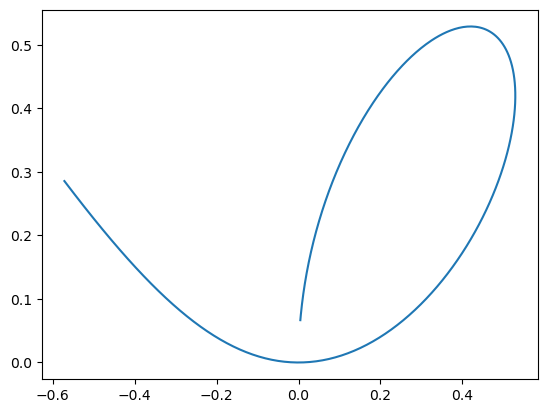

In [8]:
t = np.linspace(-.5, 15, 1000)
x = (t)/(1 + t**3)
y = (t**2)/(1 + t**3)
fig, ax = plt.subplots()
ax.plot(x, y)


Ahora vamos a mostrar la otra posibilidad.

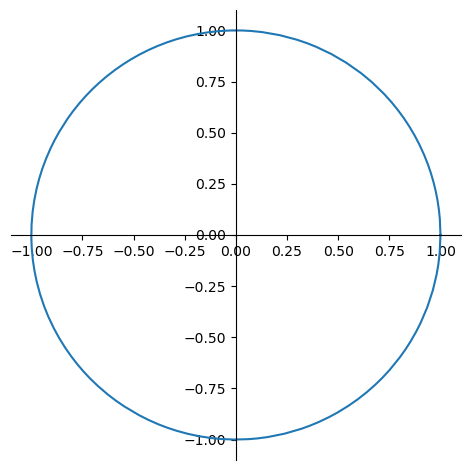

In [9]:
t = sy.symbols('t')
sy.plot_parametric((sy.cos(t), sy.sin(t)), (t, 0, 2 * sy.pi), aspect_ratio=(1,1))

### Funciones definidas de forma implícita

Para representar la circunferencia definida de forma implícita como $x^2+y^2=4$ utilizaremos el método de SymPy plot_implicit.

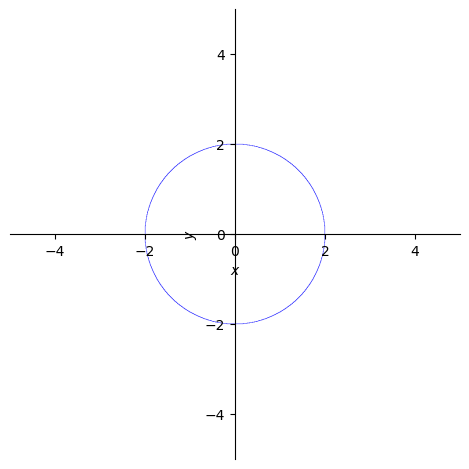

In [10]:
x, y = sy.symbols('x y')
y1 = sy.Eq(x**2 + y**2, 4)
sy.plot_implicit(y1, aspect_ratio= (1, 1))

Ejercicio propuesto:
Dibuja la curva del diablo $y^2 (y^2-b^2)=x^2(x^2-a^2)$ para:

a=1 y b=1;

a=2 y b=2.5;

In [11]:
## Escribe aquí el código


## Cálculo de límites de funciones reales de variable real

Para calcular límites de forma simbólica utilizaremos el método limit de SymPy.

Veamos algunos ejemplos

In [12]:
x = sy.symbols('x')
f1 = x**2 + 2 * x -3 
sy.limit(f1, x, 0)


-3

In [13]:
sy.limit(f1, x, np.inf)

oo

In [14]:
sy.limit(f1, x, -np.inf)

oo

Si en lugar de escribir limit, lo sustituimos por Limit observa el resultado

In [15]:
sy.Limit(f1, x, 0)

Limit(x**2 + 2*x - 3, x, 0)

También es posible resolver indeterminaciones 

In [16]:
sy.limit(sy.sin(x)/x, x, 0)

1

En el caso en el que queramos calcular límites direccionales podemos especificar la dirección de la forma que sigue

In [17]:
sy.limit(sy.exp(1/x), x, 0,'+')

oo

In [18]:
sy.limit(sy.exp(1/x), x, 0,'-')

0

Pero si representamos la función obtenemos 

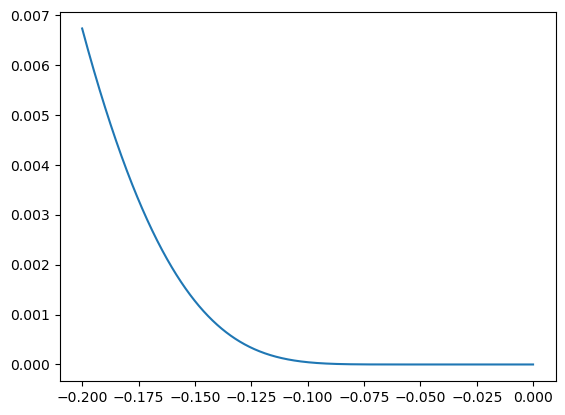

In [19]:
def f(x):
    return(math.e**(1/x))

a = np.linspace(-.2,-.0001 , 1000)
f_izquierda = f(a)
fig, ax = plt.subplots()
ax.plot(a, f_izquierda)

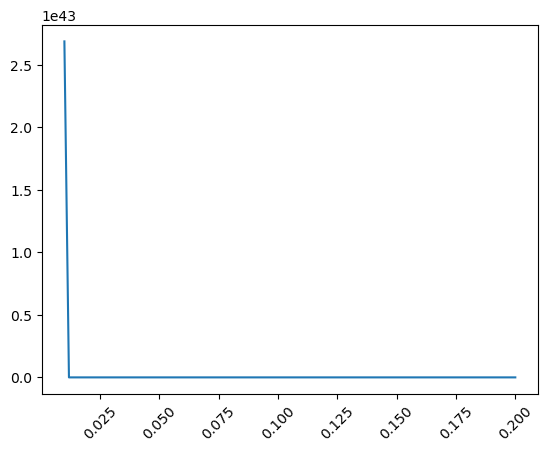

In [20]:
a = np.linspace(0.01, 0.2, 100)
f_derecha = f(a)
fig, ax = plt.subplots()
ax.plot(a, f_derecha)
ax.tick_params(axis="x", labelrotation = 45)

Ejecuta ahora la siguiente celda.

In [21]:
sy.limit(sy.sin(1/x), x, 0)

AccumBounds(-1, 1)

¿Qué ocurre? Explica el comportamiento de la función. Vamos a dibujarla en un entorno del punto $0$.

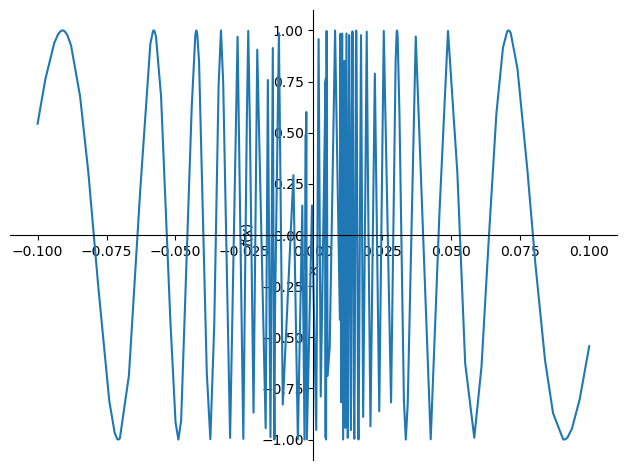

In [22]:
sy.plot(sy.sin(1/x), (x, -.1, .1))

Ahora calcula el límite cuando multiplicamos la función anterior por $x$. ¿Qué obtienes?

In [23]:
sy.limit(x*sy.sin(1/x), x, 0)

0

¿Qué obtienes? Da una razón.

### Calcula los siguientes límites:

$\lim_{x\rightarrow 0^+} \sin\left(\frac{\pi}{2} e^{\sqrt{x}}\right)$

$\lim_{x\rightarrow 0} \frac{\sin(x)}{x}$

$\lim_{x\rightarrow +\infty}\frac{e^{\frac{1}{x}}}{\log|x|}$

$\lim_{x\rightarrow -\infty}\frac{e^{\frac{1}{x}}}{\log|x|}$

In [24]:
## Escribe el código

## Cálculo de la derivada

La derivada de una función en un punto es un límite.

$$f'(x_0)=\lim_{x\rightarrow x_0}\frac{f(x)-f(x_0)}{x-x_0}=\lim_{h\rightarrow 0}\frac{f(x_0+h)-f(x_0)}{h}$$

En lugar de hacer el cálculo del límite podemos hacer aproximaciones del valor de la derivada en el punto.

In [25]:
def f(x):
    return(x**2 + 3 * x -1)

def df(x):
    h = 0.00001
    return((f(x + h) - f(x))/h)

Ahora vamos a definir una función cuyo resultado sea el dibujar la función y la recta tangente en el punto seleccionado.

In [26]:
def plot_f(x0):
    '''Dibuja la función f(x) y una aproximación de la derivada en el punto seleccionado'''
    vector1 = np.linspace(x0 - 1, x0 + 1, 30)
    fig, ax = plt.subplots()
    ax.plot(vector1, f(vector1))
    ax.plot(x0, f(x0), '-o', color='red')
    ax.plot(vector1, f(x0) + df(x0)*(vector1 - x0))

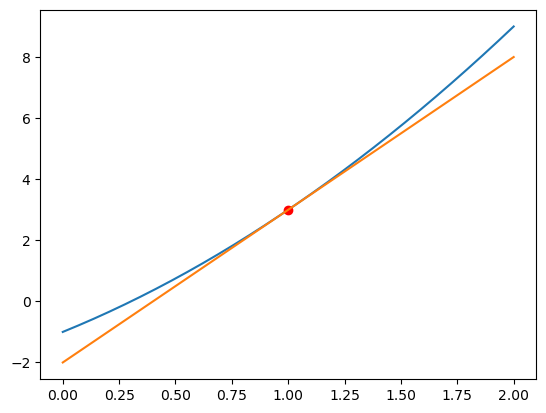

In [27]:
plot_f(1)

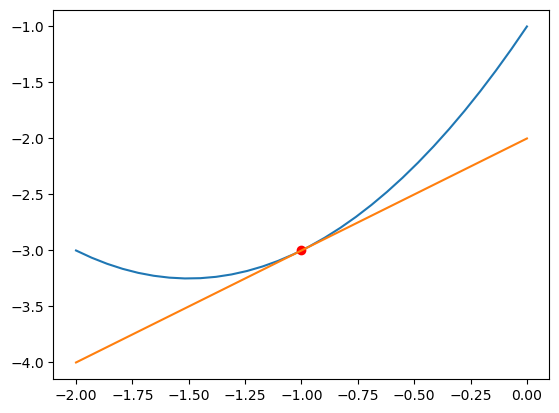

In [28]:
plot_f(-1)

Observamos que en los ejercicios anteriores hemos obtenido una aproximación del valor de la derivada, que coincide con el valor de la pendiente de la recta tangente en el punto seleccionado.

Sin embargo, podemos utilizar SymPy para calcular la derivada de una función en un punto. En este caso a través de "diff". Veamos cómo funciona.

In [29]:
x = sy.symbols('x')
sy.diff(f(x), x).subs(x, 2)

7

Recuerda que el estudio de la derivada nos permite analizar el comportamiento de la función. Así, por ejemplo, podemos calcular los puntos críticos.

In [30]:
sy.solve(sy.diff(f(x),x),x)

[-3/2]

In [31]:
sy.diff(f(x), x, 2)

2

La derivada segunda es constantemente igual a 2, por lo que en el punto $x=-3/2$ la función tiene un mínimo. Veamos el resultado obtenido con una gráfica.

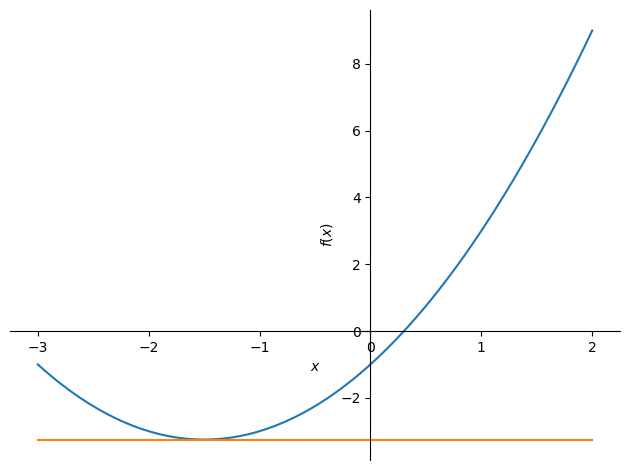

In [32]:
sy.plot(f(x),f(-3/2), (x,-3,2))

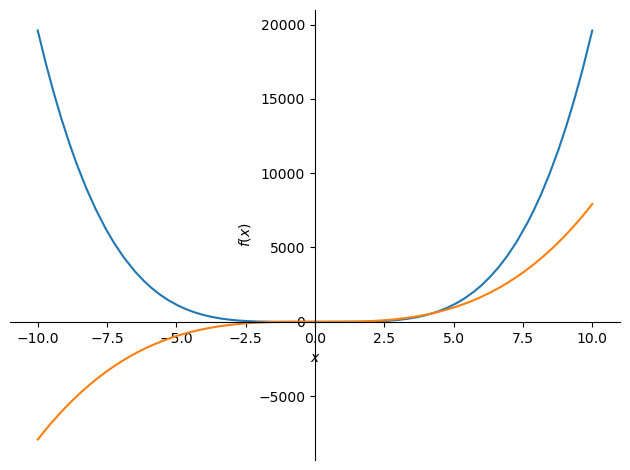

In [33]:
def g(xt):
    return(2 * xt**4 - 4 * xt**2 + 1)

def dg(xt):
    return(sy.diff(g(x), x).subs(x, xt))

sy.plot(g(x), dg(x), (x, -10, 10))

La derivada es positiva en $(0,+\infty)$ y negativa en $(-\infty,0)$.

Ejercicio propuesto. Localización de una estación solar. Ejercicio 39 página 280 del libro "University Calculus", Hass, Weir and Thomas. Debemos colocar una estación solar a nivel del suelo en la línea este-oeste entre dos edificios, uno de altura 60 metros y otro de 30 metros, separados una distancia de 50 metros. ¿En qué posición (distancia al edificio de mayor altura) hay que colocar la estación solar para maximizar el ángulo de exposición solar?

In [34]:
def angulo(dist):
    return(sy.pi - sy.atan(60/dist) - sy.atan(30/(50-dist)))

In [35]:
solucion = sy.solve(sy.diff(angulo(x), x))
solucion

[100 - 20*sqrt(17), 20*sqrt(17) + 100]

In [36]:
float(solucion[0])

17.53788748764679

In [37]:
float(solucion[1])

182.4621125123532

In [38]:
angulo(solucion[0])

-atan(60/(100 - 20*sqrt(17))) - atan(30/(-50 + 20*sqrt(17))) + pi

In [39]:
float(_)

1.1091714246536701

Este es el ángulo en radianes máximo.

## Derivación implícita

Para realizar el cálculo de la derivación implícita es posible utilizar el método idiff. 

Calcula $y'(x)$ siendo $y(x)$ tal que 
$$ y \sin(x y) = -y +2.$$

Calcula $y'(0)$ en un entorno del punto $(0,2)$


In [40]:
x, y = sy.symbols('x, y')
eq1 = y * sy.sin(x * y) + y -2
dx_eq1 = sy.idiff(eq1, y, x)
dx_eq1


-y**2*cos(x*y)/(x*y*cos(x*y) + sin(x*y) + 1)

In [41]:
dx_eq1.subs(x, 0).subs(y, 2)

-4

## Polinomio de Taylor

Vamos a calcular el polinomio de Taylor de la función $f(x)=\sin(x)$. 

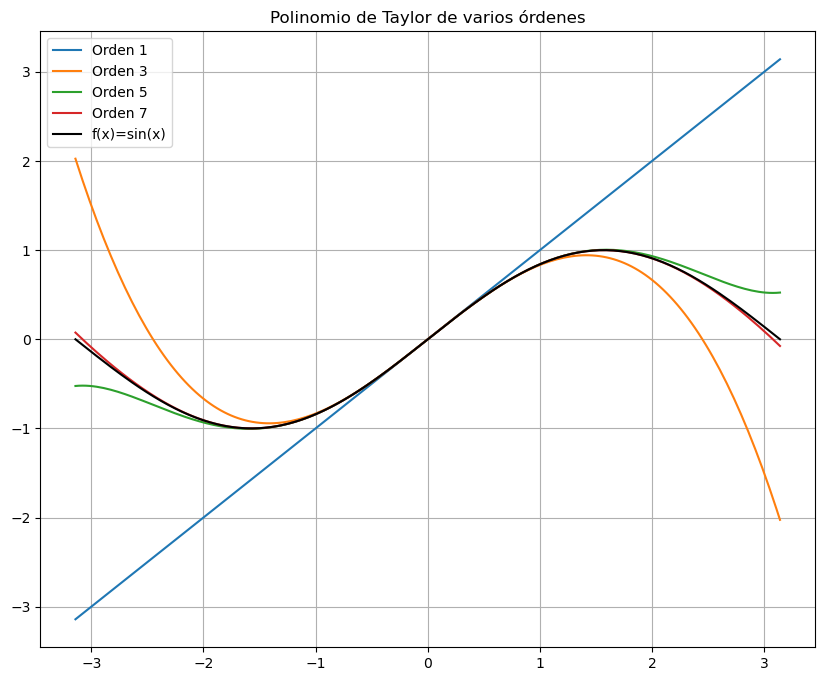

In [42]:
x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))
labels = ['Orden 1', 'Orden 3', 'Orden 5', 'Orden 7']
fig, ax = plt.subplots(figsize = (10, 8))
for n, label in zip(range(4), labels):
    y = y + ((-1)**(n)*x**(2*n+1))/np.math.factorial(2*n+1)
    ax.plot(x, y, label = label)
ax.plot(x, np.sin(x), "k", label = "f(x)=sin(x)")
ax.grid()
ax.set_title('Polinomio de Taylor de varios órdenes')
ax.legend()


Ejercicio propuesto:  Dibuja los polinomios de Taylor de la función $f(x)=e^x$ de grado
$n=3,4,5,6$ y $7$ en el punto $x=0$, junto con la función $e^x$ en un entorno del punto
en el que se aprecie la aproximación a la función de forma local.

## Método de la Bisección

El método de la bisección no es sino la aplicación del Teorema de Bolzano de forma reiterada. Partimos de un intervalo $[a,b]$ y una función $f:[a,b]\rightarrow\mathbb{R}$ tal que $f(a)\cdot f(b)<0$. Calculamos $c=\frac{a+b}{2}$. Si $f(a)\cdot f(c)<0$, entonces $b=c$, en caso contrario $a=c$ y repetimos el proceso. Observa que el error puede controlarse con la longitud del intervalo que va disminuyendo en cada iteración, es decir,
$$E_n\leq\frac{b-a}{2^n}.$$

Ejercicio: Defina una función que aplique el método de la bisección sobre una función $f(x)$ previamente definida, en este caso $f(x)=x^3-x-1$. Las variables de entrada son $a$, $b$, podemos añadir el error y limitar el número de iteraciones.

In [43]:
def f(x):
    return(x**3 - x -1)

In [44]:
## Escribe aquí el código

## Método de Newton

Vamos a mostrar la aplicación del método de Newton a la función $f(x)=x^3-x-1$.

Recordamos la construcción:
$$x_{n+1}=x_{n}-\frac{f(x_n)}{f'(x_n)}.$$

Observa que necesitamos la derivada. En lugar de calcular la derivada utilizando diff, podemos hacer una aproximación de la misma tal y como lo hemos hecho anteriormente.

In [45]:
x = sy.symbols('x')
soluciones = sy.solve(x**3 - x - 1)
sy.N(soluciones[0])

-0.662358978622373 - 0.562279512062301*I

In [46]:
sy.N(soluciones[1])

-0.662358978622373 + 0.562279512062301*I

In [47]:
sy.N(soluciones[2])

1.32471795724475

In [48]:
def f(x):
    return(x**3 - x -1)

def df(x):
    h = 0.0001
    return((f(x + h)-f(x))/h)

def newton2(x):
    return(float(x - f(x)/df(x)))

def newton(x0, error=0.0000001):
    sucesion = [x0]
    for i in range(100):
        sucesion.append(newton2(sucesion[i]))
        if (np.abs(f(sucesion[i+1])) < error):
            print(f'''La solución obtenida con
                  {i} iteraciones es {sucesion[i+1]}''')
            break
        


In [49]:
newton(1)

La solución obtenida con
                  4 iteraciones es 1.3247179572693608


Escribe 6 iteraciones de la sucesión anterior.

In [50]:
## Escribe aquí el código

Ejercicio propuesto.
Calcula todas las raíces de la ecuación: $$e^{-x} =2 x+1,$$
utilizando el método de Newton.
